## PROG8245- Machine Learning Programming

## Project: Sentiment Analysis for Social Media Data

## GROUP : 10

## Step-1 Data Collection

In [62]:
import praw
import pandas as pd
from transformers import pipeline

# Set up Reddit API credentials
reddit = praw.Reddit(
    client_id="5lcLEoOL8q6Zd_aU6p6Cog",
    client_secret="a-EynFM9uKcA2Ur7Eth7B8C62YkqbQ",
    user_agent="u/sabiha05",
)

# Load the sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")

def get_reddit_posts(subreddit_name, num_posts=10):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []

    for post in subreddit.new(limit=num_posts):
        posts.append(post.title)

    return posts

def analyze_sentiment(posts):
    results = []

    for post in posts:
        sentiment_result = sentiment_analyzer(post)
        label = sentiment_result[0]['label']
        score = sentiment_result[0]['score']

        results.append({
            "Post": post,
            "Sentiment_Label": label,
            "Score": score
        })

    return results

if __name__ == "__main__":    # subreddit
    subreddit_names = [       
        "technology",
        "science",
        "movies",
        "AskReddit",
        "aww",
        "gaming",
        "worldnews",
        "food",
        "sports",
        "fitness",
        "music",
        "books",
        "history",
        "EarthPorn",
        "Art",
        "television",
        "photography",
        "politics",
        "travel",
        "cats",
        "dogs",
        "futurology",
        "nature",
        "funny",
        "programming",
    ]
    total_posts = 1000  # Total number of posts to fetch
    batch_size = 40    # Number of posts to fetch and process at a time

    all_posts = []  # Store all posts from different subreddits
    for subreddit_name in subreddit_names:
        subreddit_posts = []  # Store posts for the current subreddit
        for offset in range(0, total_posts, batch_size):
            batch = get_reddit_posts(subreddit_name, batch_size)
            subreddit_posts.extend(batch)

        all_posts.extend(subreddit_posts)  # Add the subreddit's posts to the main list

    results = analyze_sentiment(all_posts)

    # Create a pandas DataFrame from the results
    df = pd.DataFrame(results)
    
     # Save the DataFrame to a CSV file
    df.to_csv("reddit_sentiment11.csv", index=False)

    print("Reddit posts and sentiment analysis saved to 'reddit_sentiment11.csv'")

Reddit posts and sentiment analysis saved to 'reddit_sentiment11.csv'


In [78]:
import pandas as pd

# Read the CSV file
input_file = "reddit_sentiment11.csv"
df = pd.read_csv(input_file)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Save cleaned data to the same CSV file
df.to_csv(input_file, index=False)

print("Duplicate rows removed and cleaned data saved to", input_file)

Duplicate rows removed and cleaned data saved to reddit_sentiment11.csv


## Step-2 Preprocessing

In [79]:
# Loading require library
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the CSV file with sentiment analysis results
sentiment_analysis_file_path = "reddit_sentiment11.csv"
df = pd.read_csv(sentiment_analysis_file_path)

# Preprocessing functions
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove hashtags and mentions
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'@\w+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and punctuations
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)
    
# Apply preprocessing to each post in the DataFrame
df['Preprocessed_Post'] = df['Post'].apply(preprocess_text)

# Save the preprocessed DataFrame to a new CSV file
preprocessed_file_path = "reddit_sentiment_preprocessed.csv"
df.to_csv(preprocessed_file_path, index=False)

print("Preprocessed data saved to 'reddit_sentiment_preprocessed.csv'")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessed data saved to 'reddit_sentiment_preprocessed.csv'


## Step-3 Feature Extraction

## Bags of words

Bag-of-Words Representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Vocabulary (Unique Words):
['01' '02' '03' ... 'zoo' 'zoologist' 'zucchini']


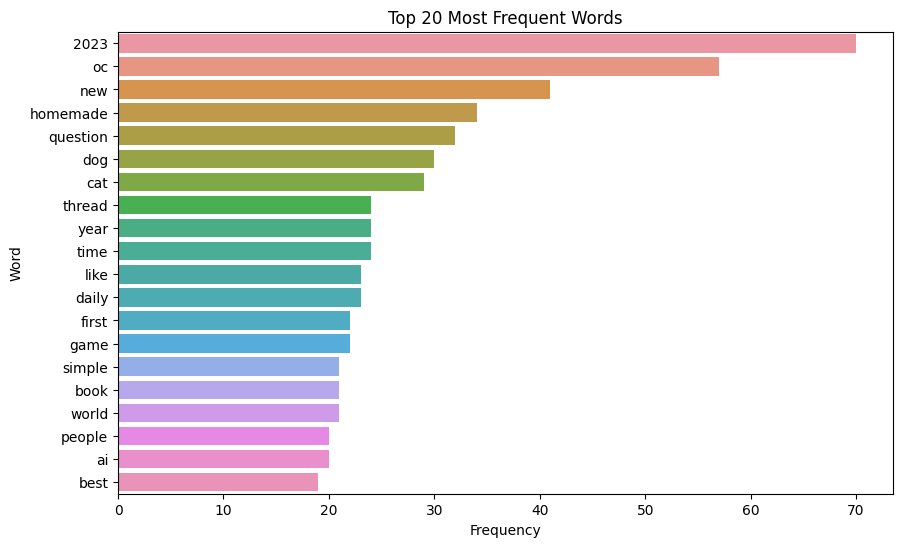

In [141]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed CSV file
preprocessed_file_path = "reddit_sentiment_preprocessed.csv"
df = pd.read_csv(preprocessed_file_path)

# Extract the preprocessed text
corpus = df['Preprocessed_Post'].tolist()

# Bag-of-Words representation
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(corpus)

# Bag-of-Words representation
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(corpus)

# Print the bag-of-words representation
print("Bag-of-Words Representation:")
print(X_bow.toarray())

print("\n")

# Print the vocabulary (list of unique words)
print("Vocabulary (Unique Words):")
print(vectorizer_bow.get_feature_names_out())

# Create a word frequency matrix (dense version of X_bow)
word_frequencies = X_bow.sum(axis=0).A1
word_freq_df = pd.DataFrame({'Word': vectorizer_bow.get_feature_names_out(), 'Frequency': word_frequencies})

# Sort the words by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the top 20 most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20))
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

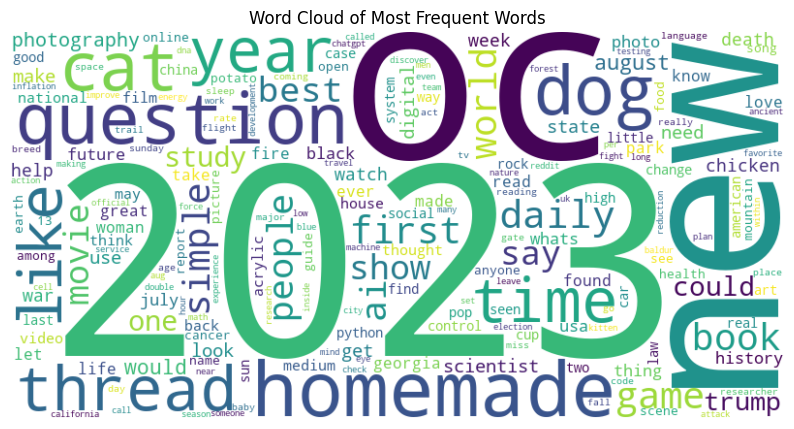

In [99]:
from wordcloud import WordCloud
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq_df.values))
# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Frequent Words')
plt.axis('off')
plt.show()

## TF-IDF

In [147]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed CSV file
preprocessed_file_path = "reddit_sentiment_preprocessed.csv"
df = pd.read_csv(preprocessed_file_path)

# Extract the preprocessed text
corpus = df['Preprocessed_Post'].tolist()

# TF-IDF representation
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(corpus)

# TF-IDF representation
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(corpus)

# Print the TF-IDF matrix (dense version of X_tfidf)
print("TF-IDF Matrix:")
print(X_tfidf.toarray())

print("\n")
# Print the vocabulary (list of unique words)
print("Vocabulary (Unique Words):")
print(vectorizer_tfidf.get_feature_names_out())

# Calculate the IDF (inverse document frequency) values
idf_values = vectorizer_tfidf.idf_

# Create a DataFrame with words and their corresponding IDF values
idf_df = pd.DataFrame({'Word': vectorizer_tfidf.get_feature_names_out(), 'IDF': idf_values})

# Sort the words by IDF in ascending order
idf_df = idf_df.sort_values(by='IDF', ascending=True)

TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Vocabulary (Unique Words):
['01' '02' '03' ... 'zoo' 'zoologist' 'zucchini']


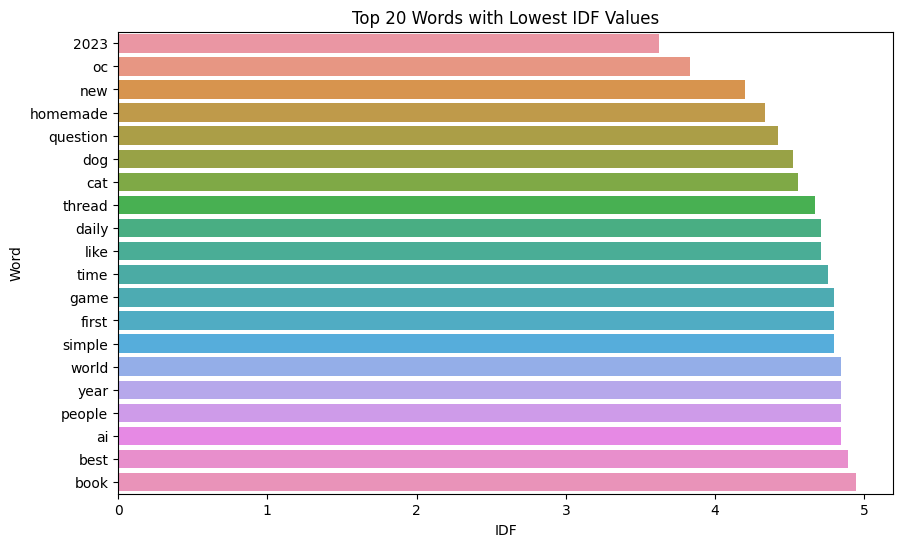

In [102]:
# Plot the top 20 words with lowest IDF values (most common words)
plt.figure(figsize=(10, 6))
sns.barplot(x='IDF', y='Word', data=idf_df.head(20))
plt.title('Top 20 Words with Lowest IDF Values')
plt.xlabel('IDF')
plt.ylabel('Word')
plt.show()

## Word2Vec

In [110]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the preprocessed CSV file
preprocessed_file_path = "reddit_sentiment_preprocessed.csv"
df = pd.read_csv(preprocessed_file_path)

# Extract the preprocessed text
corpus = df['Preprocessed_Post'].tolist()

# Split sentences into individual words for Word2Vec training
sentences = [post.split() for post in corpus]

# Word2Vec representation (word embeddings)
model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Obtain word embeddings for individual words
# Let's consider the embeddings for the first 10 words in the vocabulary
words_to_visualize = list(model_w2v.wv.index_to_key)[:10]
word_vectors = model_w2v.wv[words_to_visualize]

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)


word_vector_cat = model_w2v.wv['cat']
print("Vector representation of 'cat':")
print("\n")
print(word_vector_cat)

Vector representation of 'cat':


[ 7.85744190e-03 -4.12490778e-03 -4.36694390e-04  1.02829095e-03
 -2.37425818e-04  5.82431909e-04  6.46826392e-03  6.82767655e-04
 -3.57704307e-03 -1.59436115e-03  5.69674652e-03  6.52328774e-04
 -5.78914478e-04  9.61751398e-03 -4.79398947e-03 -1.26623840e-03
  9.30760801e-03  6.46793423e-03  1.77172816e-03 -9.70637519e-03
  1.32677855e-03 -2.17722938e-03  9.74184740e-03  1.10300630e-03
  1.31513213e-03  2.71164533e-03 -1.93491974e-03 -5.38070593e-03
  1.00255296e-04 -2.22369307e-03  7.07647065e-03  9.02130827e-03
 -6.30789669e-04  3.03783617e-03 -6.12642197e-03  1.99739914e-03
 -6.85629528e-03 -9.11403075e-03 -5.95517317e-03 -9.70870722e-03
  7.58034457e-03 -6.35053031e-03  8.13210011e-03 -7.20063644e-03
  3.46955727e-03  9.51089151e-03 -8.40784423e-03 -1.00334520e-02
 -4.39442368e-03 -2.54776352e-03 -8.66461705e-05 -9.44970828e-03
 -9.11626779e-03  2.42843572e-03 -8.48725345e-03 -8.76242761e-03
 -1.79559004e-03 -8.77365563e-03 -7.40439910e-03 -8.5170

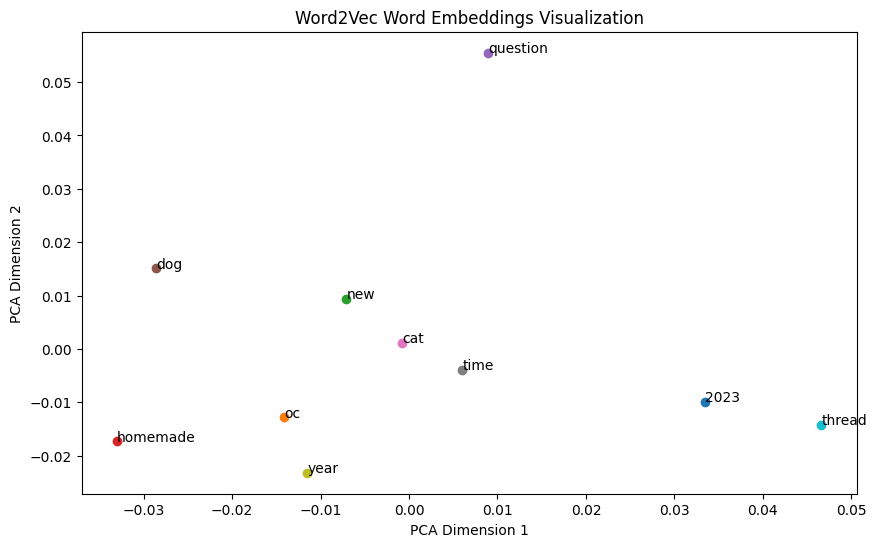

In [111]:
# Plot the word embeddings
plt.figure(figsize=(10, 6))
for i, word in enumerate(words_to_visualize):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('Word2Vec Word Embeddings Visualization')
plt.show()


## Step-4 Model Selection and Training 

**Naive Bayes classifier**

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the preprocessed CSV file
preprocessed_file_path = "reddit_sentiment_preprocessed.csv"
df = pd.read_csv(preprocessed_file_path)

X = X_bow  # feature representation 
y = df['Sentiment_Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = naive_bayes_classifier.predict(X_train)
y_test_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\n")
# Classification report for the testing set
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Training Accuracy: 0.9668367346938775
Testing Accuracy: 0.7193877551020408


Classification Report:
               precision    recall  f1-score   support

         NEG       0.51      0.54      0.53        35
         NEU       0.85      0.82      0.83       142
         POS       0.27      0.32      0.29        19

    accuracy                           0.72       196
   macro avg       0.54      0.56      0.55       196
weighted avg       0.73      0.72      0.73       196



**Naive Bayes classifier with stratified cross-validation**

In [150]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the preprocessed CSV file
preprocessed_file_path = "reddit_sentiment_preprocessed.csv"
df = pd.read_csv(preprocessed_file_path)

X = X_bow  # feature representation 
y = df['Sentiment_Label']

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Initialize stratified k-fold cross-validator
n_splits = 5  
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store accuracy scores and classification reports for each fold
accuracy_scores = []
classification_reports = []

# Perform stratified cross-validation
for train_idx, test_idx in stratified_kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the Naive Bayes classifier
    naive_bayes_classifier.fit(X_train, y_train)

    # Predict on the testing data
    y_test_pred = naive_bayes_classifier.predict(X_test)

    # Evaluate the performance
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_scores.append(accuracy)

    classification_rep = classification_report(y_test, y_test_pred)
    classification_reports.append(classification_rep)

    # Calculate and print average accuracy across folds
average_accuracy = sum(accuracy_scores) / n_splits
print("Average Accuracy:", average_accuracy)
print("\n")
# Print classification reports for each fold
for fold_num, classification_rep in enumerate(classification_reports, start=1):
    print(f"Classification Report for Fold {fold_num}:\n", classification_rep)

Average Accuracy: 0.6551020408163265


Classification Report for Fold 1:
               precision    recall  f1-score   support

         NEG       0.37      0.34      0.35        32
         NEU       0.80      0.75      0.78       142
         POS       0.15      0.23      0.18        22

    accuracy                           0.63       196
   macro avg       0.44      0.44      0.44       196
weighted avg       0.66      0.63      0.64       196

Classification Report for Fold 2:
               precision    recall  f1-score   support

         NEG       0.34      0.34      0.34        32
         NEU       0.76      0.73      0.74       142
         POS       0.14      0.18      0.16        22

    accuracy                           0.60       196
   macro avg       0.41      0.42      0.41       196
weighted avg       0.62      0.60      0.61       196

Classification Report for Fold 3:
               precision    recall  f1-score   support

         NEG       0.42      0.34      

In [151]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the preprocessed CSV file
preprocessed_file_path = "reddit_sentiment_preprocessed.csv"
df = pd.read_csv(preprocessed_file_path)

X = X_bow
y = df['Sentiment_Label']

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Initialize stratified k-fold cross-validator
n_splits = 5 
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# List to store accuracy scores for each fold
accuracy_scores = []

# Perform stratified cross-validation
for train_idx, test_idx in stratified_kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the Naive Bayes classifier
    naive_bayes_classifier.fit(X_train, y_train)

    # Predict on the testing data
    y_test_pred = naive_bayes_classifier.predict(X_test)

    # Evaluate the performance
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_scores.append(accuracy)

    # Print accuracy for each fold
for fold_num, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Accuracy for Fold {fold_num}: {accuracy}")

Accuracy for Fold 1: 0.6275510204081632
Accuracy for Fold 2: 0.6020408163265306
Accuracy for Fold 3: 0.6785714285714286
Accuracy for Fold 4: 0.6683673469387755
Accuracy for Fold 5: 0.6989795918367347


**Random Forest model**

In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the preprocessed CSV file
preprocessed_file_path = "reddit_sentiment_preprocessed.csv"
df = pd.read_csv(preprocessed_file_path)

X = X_bow  # feature representation 
y = df['Sentiment_Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = random_forest_classifier.predict(X_train)
y_test_pred = random_forest_classifier.predict(X_test)

# Evaluate the performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

import warnings
warnings.filterwarnings('ignore')
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\n")
# Classification report for the testing set
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Training Accuracy: 1.0
Testing Accuracy: 0.7295918367346939


Classification Report:
               precision    recall  f1-score   support

         NEG       1.00      0.03      0.06        35
         NEU       0.73      1.00      0.84       142
         POS       0.00      0.00      0.00        19

    accuracy                           0.73       196
   macro avg       0.58      0.34      0.30       196
weighted avg       0.71      0.73      0.62       196



**Random Forest model with stratified cross-validation**

In [153]:

import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the preprocessed CSV file
preprocessed_file_path = "reddit_sentiment_preprocessed.csv"
df = pd.read_csv(preprocessed_file_path)

X = X_bow  # feature representation 
y = df['Sentiment_Label']

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Initialize stratified k-fold cross-validator
n_splits = 5  
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

import warnings
warnings.filterwarnings('ignore')
# Lists to store accuracy scores and classification reports for each fold
accuracy_scores = []
classification_reports = []

# Perform stratified cross-validation
for train_idx, test_idx in stratified_kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the Random Forest classifier
    random_forest_classifier.fit(X_train, y_train)

    # Predict on the testing data
    y_test_pred = random_forest_classifier.predict(X_test)

    # Evaluate the performance
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_scores.append(accuracy)

    classification_rep = classification_report(y_test, y_test_pred)
    classification_reports.append(classification_rep)
    
# Calculate and print average accuracy across folds
average_accuracy = sum(accuracy_scores) / n_splits
print("Average Accuracy:", average_accuracy)
print("\n")
# Print classification reports for each fold
for fold_num, classification_rep in enumerate(classification_reports, start=1):
    print(f"Classification Report for Fold {fold_num}:\n", classification_rep)

Average Accuracy: 0.7275510204081632


Classification Report for Fold 1:
               precision    recall  f1-score   support

         NEG       0.00      0.00      0.00        32
         NEU       0.73      0.99      0.84       142
         POS       0.50      0.09      0.15        22

    accuracy                           0.72       196
   macro avg       0.41      0.36      0.33       196
weighted avg       0.58      0.72      0.62       196

Classification Report for Fold 2:
               precision    recall  f1-score   support

         NEG       0.75      0.09      0.17        32
         NEU       0.73      0.99      0.84       142
         POS       0.00      0.00      0.00        22

    accuracy                           0.73       196
   macro avg       0.49      0.36      0.34       196
weighted avg       0.65      0.73      0.64       196

Classification Report for Fold 3:
               precision    recall  f1-score   support

         NEG       0.67      0.06      

In [154]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed CSV file
preprocessed_file_path = "reddit_sentiment_preprocessed.csv"
df = pd.read_csv(preprocessed_file_path)

X = X_bow  # feature representation
y = df['Sentiment_Label']

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Initialize stratified k-fold cross-validator
n_splits = 5  # You can change the number of splits as needed
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# List to store accuracy scores for each fold
accuracy_scores = []

# Perform stratified cross-validation
for train_idx, test_idx in stratified_kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the Random Forest classifier
    random_forest_classifier.fit(X_train, y_train)

    # Predict on the testing data
    y_test_pred = random_forest_classifier.predict(X_test)

    # Evaluate the performance and store accuracy
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_scores.append(accuracy)

    
# Print accuracy for each fold
for fold_num, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Accuracy for Fold {fold_num}: {accuracy}")


Accuracy for Fold 1: 0.7244897959183674
Accuracy for Fold 2: 0.7295918367346939
Accuracy for Fold 3: 0.7295918367346939
Accuracy for Fold 4: 0.7346938775510204
Accuracy for Fold 5: 0.7193877551020408


## Step-5 Deployment and Interface

In [157]:
import tkinter as tk
from tkinter import messagebox
from transformers import pipeline

# Create the sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")

# Function to analyze sentiment and update the result label
def analyze_sentiment():
    user_input = input_text.get("1.0", "end-1c")
    if user_input.strip():  # Checks if the input is not empty
        sentiment_result = sentiment_analyzer(user_input)
        label = sentiment_result[0]['label']
        score = sentiment_result[0]['score']

        result_text.insert(tk.END, f"Text: {user_input}\nSentiment: {label} (Score: {score:.2f})\n\n")

        # Clear the input text
        input_text.delete("1.0", tk.END)
    else:
        messagebox.showwarning("Warning", "Please enter a text!")

# Create the main application window
root = tk.Tk()
root.title("Social Media Sentiment Analysis")

# Create and place UI elements
input_label = tk.Label(root, text="Enter a Social Media Post:")
input_label.pack()

input_text = tk.Text(root, height=5, width=40)
input_text.pack()

analyze_button = tk.Button(root, text="Analyze Sentiment", command=analyze_sentiment)
analyze_button.pack()

result_label = tk.Label(root, text="Sentiment Analysis Results:")
result_label.pack()

# Create a text area to display the results
result_text = tk.Text(root, height=10, width=40)
result_text.pack()

# Start the main event loop
root.mainloop()
